# Sentiment Analysis on Text Data

###  Python Imports for Deep Learning and NLP Task

##### **Deep Learning (Keras)**
- `Sequential` - Used to build a sequential model.
- `Dense` - Fully connected layer for neural networks.
- `Dropout` - Regularization technique to prevent overfitting.
- `BatchNormalization` - Normalizes activations to stabilize training.
- `ReLU` - Activation function for non-linearity.
- `Adam`, `SGD` - Optimizers for training the model.

##### **Data Handling (Pandas & NumPy)**
- `pandas` (`pd`) - Data manipulation and analysis.
- `numpy` (`np`) - Array processing and numerical computations.

##### **Natural Language Processing (NLTK & Emoji)**
- `nltk` - Natural language toolkit for text processing.
- `WordNetLemmatizer` - Lemmatization to normalize words.
- `emoji` - Handles emojis in text data.

##### **Feature Engineering (Scikit-learn)**
- `TfidfVectorizer` - Converts text into TF-IDF features.
- `train_test_split` - Splits dataset into training and testing sets.
- `resample` - Used for data resampling (e.g., handling imbalanced data).

##### **Text Cleaning & Regular Expressions**
- `re` - Regular expressions for text processing.
- `string` - String manipulations.

##### **Performance Evaluation (Scikit-learn)**
- `accuracy_score` - Computes classification accuracy.
- `confusion_matrix` - Evaluates model performance with a confusion matrix.

##### **Data Visualization (Matplotlib & Seaborn)**
- `matplotlib.pyplot` (`plt`) - Creates plots and figures.
- `seaborn` (`sns`) - Statistical data visualization.

##### **Categorical Data Handling (Keras)**
- `to_categorical` - Converts labels to one-hot encoding.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization,ReLU
from keras.optimizers import Adam,SGD
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import string
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix

2025-03-17 23:12:34.998503: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-17 23:12:35.036225: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Downloading and Importing essential NLP Packages

- **stopwords** - Words that are commonly used in the English language.
- **punkt** - A tokenizer model for splitting text into words or sentences.

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/ap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Reading and Visualizing the Data

We have used on `Text` and `Sentiment` columns for our analysis. The `Sentiment` column is our target variable, and the `Text` column is our feature variable.

In [4]:
path = "./sentimentdataset.csv"
df = pd.read_csv(path)

In [5]:
df.shape

(732, 15)

In [6]:
(df.head())


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [7]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

#### Cleaning Target Variable and OverSampling 

The Sentiment column had a lot of spaces which were removed using the `strip()` function.

In [8]:
df['Sentiment'] = df['Sentiment'].str.strip().str.replace(r'\s+', '', regex=True)

#### OverSampling

This was done to balance the dataset. The dataset was imbalanced, and the model was biased towards the majority class. We used the `resample` function from the `sklearn.utils` module to balance the dataset.

In [9]:
class_counts = df['Sentiment'].value_counts()
rare_classes = class_counts[class_counts < 2].index

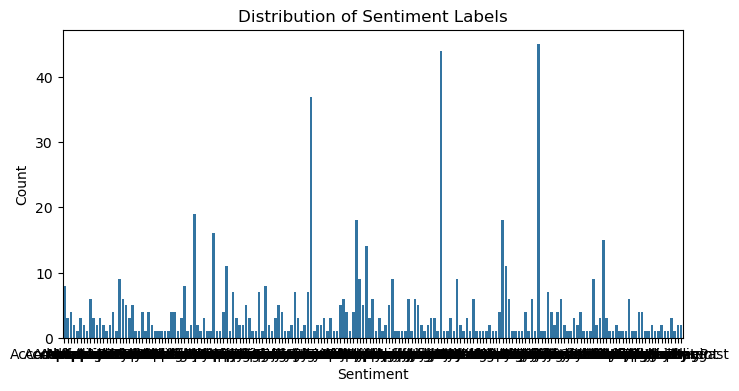

In [10]:
df['label_cat'] = df['Sentiment'].astype('category')
plt.figure(figsize=(8, 4))
sns.countplot(x='label_cat', data=df)
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Classes which were less than 2 were resampleed to 5. This was done to balance the dataset.

In [11]:
balanced_df = df.copy()
for rare_class in rare_classes:
    rare_samples = df[df['Sentiment'] == rare_class]
    duplicated_samples = resample(rare_samples, replace=True, n_samples=5, random_state=42)  # Duplicate the sample
    balanced_df = pd.concat([balanced_df, duplicated_samples], ignore_index=True)
df = balanced_df

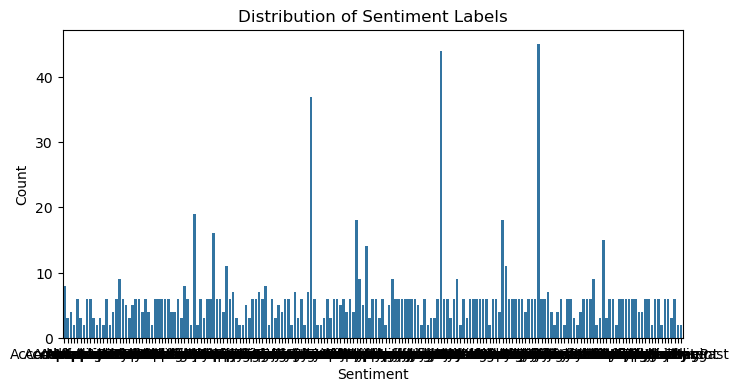

In [12]:
df['label_cat'] = df['Sentiment'].astype('category')
plt.figure(figsize=(8, 4))
sns.countplot(x='label_cat', data=df)
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### Data Preprocessing

#### Lemmatization

Lemmatization is the process of converting a word to its base form. It is similar to stemming, but it is more accurate as it converts the word into a meaningful base form. We used the `WordNetLemmatizer` from the `nltk.stem` module to lemmatize the text data.

This is done as part of Data Preprocessing.

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

- Unnecessary URLs, emojis and special characters were removed from the text data.
- Only alphabets were retained in the text data.
- Tokenization was performed to split the text data into words.
- Stopwords were removed from the text data.
- Lemmatization was performed to convert words into their base form.

In [14]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text) 
    text = emoji.replace_emoji(text, replace='')  
    text = text.translate(str.maketrans("", "", string.punctuation))  
    text = re.sub(r"[^a-zA-Z]", " ", text)  
    text = re.sub(r"\s+", " ", text).strip()  
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word not in stop_words]  
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  
    return " ".join(tokens)

In [15]:
df1=df.copy()
df1['clean_text'] = df1['Text'].apply(preprocess_text)
(df1['clean_text'].head())

0         enjoying beautiful day park
1            traffic terrible morning
2            finished amazing workout
3    excited upcoming weekend getaway
4    trying new recipe dinner tonight
Name: clean_text, dtype: object

**All the classes/sentiments were gives a numerical value.**

In [16]:
df1['label_num'] = df1['Sentiment'].astype('category').cat.codes
print("Label mapping:")
print(dict(enumerate(df1['Sentiment'].astype('category').cat.categories)))

Label mapping:
{0: 'Acceptance', 1: 'Accomplishment', 2: 'Admiration', 3: 'Adoration', 4: 'Adrenaline', 5: 'Adventure', 6: 'Affection', 7: 'Amazement', 8: 'Ambivalence', 9: 'Amusement', 10: 'Anger', 11: 'Anticipation', 12: 'Anxiety', 13: 'Appreciation', 14: 'Apprehensive', 15: 'Arousal', 16: 'ArtisticBurst', 17: 'Awe', 18: 'Bad', 19: 'Betrayal', 20: 'Bitter', 21: 'Bitterness', 22: 'Bittersweet', 23: 'Blessed', 24: 'Boredom', 25: 'Breakthrough', 26: 'Calmness', 27: 'Captivation', 28: 'Celebration', 29: 'CelestialWonder', 30: 'Challenge', 31: 'Charm', 32: 'Colorful', 33: 'Compassion', 34: 'Compassionate', 35: 'Confidence', 36: 'Confident', 37: 'Confusion', 38: 'Connection', 39: 'Contemplation', 40: 'Contentment', 41: 'Coziness', 42: 'CreativeInspiration', 43: 'Creativity', 44: 'CulinaryAdventure', 45: 'CulinaryOdyssey', 46: 'Curiosity', 47: 'Darkness', 48: 'Dazzle', 49: 'Desolation', 50: 'Despair', 51: 'Desperation', 52: 'Determination', 53: 'Devastated', 54: 'Disappointed', 55: 'Disappo

In [17]:
df1['Sentiment'].astype('category')

0       Positive
1       Negative
2       Positive
3       Positive
4        Neutral
          ...   
1122    Intrigue
1123    Intrigue
1124    Intrigue
1125    Intrigue
1126    Intrigue
Name: Sentiment, Length: 1127, dtype: category
Categories (191, object): ['Acceptance', 'Accomplishment', 'Admiration', 'Adoration', ..., 'Wonder', 'Wonderment', 'Yearning', 'Zest']

### Splitting the Data into Training and Testing Sets

The dataset was split into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module. The training set was used to train the model, and the testing set was used to evaluate the model's performance.

In [18]:
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(
    df1['clean_text'], df1['label_num'], test_size=0.2, random_state=42, stratify=df1['label_num']
)

### Text Vectorization using TF-IDF

TF-IDF vectorization was performed on the text data using the `TfidfVectorizer` from the `sklearn.feature_extraction.text` module. It converts the text data into numerical features that can be used for training the model.

In [19]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf1 = vectorizer.fit_transform(X_train_df1)
X_test_tfidf1 = vectorizer.transform(X_test_df1)

print("Training set shape (TF-IDF):", X_train_tfidf1.shape)
print("Testing set shape (TF-IDF):", X_test_tfidf1.shape)

Training set shape (TF-IDF): (901, 2057)
Testing set shape (TF-IDF): (226, 2057)


### Models

We have used MLP models for our analysis. The models were trained using the training set and evaluated using the testing set.

In [20]:
model1 = Sequential([
    Dense(100, activation='relu', input_shape=(2057,)),
    Dense(50, activation='relu'),
    Dense(191, activation='softmax') ##! We have used softmax activation function in the output layer because we have multiple classes to predict
])
model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy']) #! We have used Adam optimizer and categorical_crossentropy loss function

/home/ap/miniconda3/envs/ap/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model2 = Sequential([
    Dense(1024, activation=None, input_shape=(2057,)),  # L1 regularization
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),

    Dense(1024, activation=None),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),

    Dense(512, activation=None),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),

    Dense(191, activation='softmax')
]) 
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
model3 = Sequential([
    Dense(100, activation='relu', input_shape=(2057,)),
    Dense(50, activation='relu'),
    Dense(191, activation='softmax')
])
model3.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])


In [23]:
model4 = Sequential([
    Dense(1024, activation=None, input_shape=(2057,)),  # L1 regularization
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),

    Dense(1024, activation=None),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),

    Dense(512, activation=None),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),

    Dense(191, activation='softmax')
]) 
model4.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])


### Predicition Function

The `pred` function takes model, test data and true test values as input and returns the accuracy score.

**NOTE: Since there are 191 classes, we couldn't print out the confusion matrix because of visual cluttering and space constraints.**

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def pred(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_test11 = to_categorical(y_test, num_classes=191)
    y_test_labels = np.argmax(y_test11, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    # cm = confusion_matrix(y_test_labels, y_pred_labels)
    # plt.figure(figsize=(6, 5))
    # sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    # plt.xlabel("Predicted Label")
    # plt.ylabel("True Label")
    # plt.title("Confusion Matrix")
    # plt.show()

    return accuracy

In [25]:
y_train_one_hot_df1= to_categorical(y_train_df1, num_classes=191) ## One hot encoding of the target variable

In [26]:
model1.fit(X_train_tfidf1, y_train_one_hot_df1, epochs=200, batch_size=32) ## Fitting the model

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0295 - loss: 5.2440
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0805 - loss: 5.1650
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0671 - loss: 4.9507
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0477 - loss: 4.5396
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0813 - loss: 4.1646
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1034 - loss: 3.6731
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3613 - loss: 3.1967
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6176 - loss: 2.5821
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7615 - loss: 1.9110
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8115 - loss: 1.4968
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 1.1008
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy:

In [27]:
pred(model1,X_test_tfidf1,y_test_df1) ## prediction using the model and accuracy calculation

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


0.7256637168141593

In [28]:
model2.fit(X_train_tfidf1, y_train_one_hot_df1, epochs=200, batch_size=32) ## Fitting the model

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.0869 - loss: 5.0913
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6370 - loss: 1.9284
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8503 - loss: 0.9767
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9618 - loss: 0.3791
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9864 - loss: 0.1969
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9986 - loss: 0.1015
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 0.0650
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 1.0000 - loss: 0.0501
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 1.0000 - loss: 0.0343
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9996 - loss: 0.0343
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.0289
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

In [29]:
pred(model2,X_test_tfidf1,y_test_df1) ## prediction using the model and accuracy calculation

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


0.7300884955752213

In [30]:
y_train_df1_labels = np.argmax(y_train_one_hot_df1, axis=1) ## Converting the one hot encoded target variable to labels for the model

In [31]:
model3.fit(X_train_tfidf1, y_train_df1_labels, epochs=200, batch_size=32) ## Fitting the model

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0105 - loss: 5.2509    
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0396 - loss: 5.2389
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0425 - loss: 5.2185
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0377 - loss: 5.2059
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0462 - loss: 5.1774
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0425 - loss: 5.1692
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0362 - loss: 5.1508
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0339 - loss: 5.1434   
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0544 - loss: 5.1164
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0484 - loss: 5.0749
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0479 - loss: 5.0680
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

In [32]:
pred(model3,X_test_tfidf1,y_test_df1) ## prediction using the model and accuracy calculation

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


0.7079646017699115

In [33]:
model4.fit(X_train_tfidf1, y_train_df1_labels, epochs=200, batch_size=32) ## Fitting the model


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0428 - loss: 5.2767
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5808 - loss: 2.4230
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7717 - loss: 1.3747
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8672 - loss: 0.8927
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9668 - loss: 0.5276
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9898 - loss: 0.3401
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9976 - loss: 0.2027
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.1443
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9989 - loss: 0.1027
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.1031
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.0729
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

In [34]:
pred(model4,X_test_tfidf1,y_test_df1)   ## prediction using the model and accuracy calculation

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


0.7300884955752213

### Saving the Model

The model was saved using the `save` function from the `keras.models` module. The model was saved in the `.keras` format.

In [36]:
model1.save('part2_model1.keras')
model2.save('part2_model2.keras')
model3.save('part2_model3.keras')
model4.save('part2_model4.keras')